<a href="https://colab.research.google.com/github/ms337/eegDNNClassifier/blob/master/DNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron for Binary Classification

The following notebook is an implementation of an MLP for binary classification of the given data into faces vs. small objects. 

The algorithm is a standard multilayer perceptron with ReLu hidden layers and Sigmoid Output layer, with a binary cross-entropy loss function to classify face inputs as 0 and small objects as 1. 

The implementation uses Tensorflow and Keras and is trained using 1 GPU on the Google Colab Platform. 

## Setup/Imports

Importing numpy, tensorflow, and test for GPU availiability. 



In [0]:
import numpy as np
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Importing h5py for reading the data earlier processed and stored in the HDF5 format. More information about the format can be found here: https://www.h5py.org/

Importing sklearn for preprocessing tools to normalize the data, and then keras for implementing the MLP.

In [0]:
import h5py
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras

Using TensorFlow backend.


## Loading Data

We then import our data using h5py stored in Google Drive. Will need an authentication code if the data needs to be accessed again. 

In [0]:
from google.colab import drive
drive.mount('/gdrive')

#will need authentication access to load data from data.h5
#if needed, should upload data to personal google drive and then run this cell to get access to the file

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


Loading data in the file.

In [0]:
data = h5py.File("/gdrive/My Drive/Colab Notebooks/data.h5", 'r')
#if using custom data file, upload data into google drive (earlier step), and then put the path here.


I load the train, dev, and test sets which had already been partitioned earlier on the stored data set. See data processing script for reference. 

In [0]:
def load_dataset():
    X_train = np.array(data["X_train"])
    Y_train = np.array(data["Y_train"])
    X_dev = np.array(data["X_dev"])
    Y_dev = np.array(data["Y_dev"])
    X_test = np.array(data["X_test"])
    Y_test = np.array(data["Y_test"])
    return preprocessing.scale(X_train), Y_train, preprocessing.scale(X_dev), Y_dev, preprocessing.scale(X_test), Y_test

X_train, Y_train, X_dev, Y_dev, X_test, Y_test = load_dataset()


In [0]:
print("No. of parameters = " + str(X_train.shape[0]))
print("No. of training set samples = " + str(X_train.shape[1]))
print("No. of dev set samples = " + str(X_dev.shape[1]))
print("No. of test set samples = " + str(X_dev.shape[1]))

## Model


I build the MLP model with 4 layers using the keras library. 

Each layer uses a relu activation function. 
The output layer has a sigmoid function. 
The binary cross-entropy function is used as the loss function. 

I use the Adam optimizer since it is known to work with well in such kinds of models. I use He initialization to initialize the layers because He-initialization is documented to work well with relu function. 



In [0]:
with tf.device('/device:GPU:0'):
  classifier = keras.Sequential()
  #First Hidden Layer
  classifier.add(keras.layers.Dense(306, activation='relu', kernel_initializer='he_normal', input_dim=306))
  classifier.add(keras.layers.Dense(150, activation='relu', kernel_initializer='he_normal'))
  classifier.add(keras.layers.Dense(75, activation='relu', kernel_initializer='he_normal' ))
  classifier.add(keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal' )) 
  #Output Layer
  classifier.add(keras.layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal'))
  classifier.compile(optimizer =tf.train.AdamOptimizer(),loss='binary_crossentropy', metrics =['accuracy'])
  
  
  

## Model Training

We train our model for 100 epochs using mini-batch gradient descent with the batch size as 256. We simultaneously test our model performance on a dev set (cross validation set) to see progression of accuracy and assess bias and variance. This will help us understand what we could tune to optimize the model's performance. 

In [0]:
history = classifier.fit(X_train.T,Y_train.T, batch_size=128, epochs=50, validation_data = (X_dev.T, Y_dev.T))

Train on 562032 samples, validate on 31224 samples
Epoch 1/50
562032/562032 [==============================] - 40s 71us/step - loss: 0.1682 - acc: 0.9317 - val_loss: 0.2358 - val_acc: 0.9030
Epoch 2/50
562032/562032 [==============================] - 40s 71us/step - loss: 0.1593 - acc: 0.9358 - val_loss: 0.2346 - val_acc: 0.9061
Epoch 3/50
562032/562032 [==============================] - 40s 70us/step - loss: 0.1517 - acc: 0.9389 - val_loss: 0.2288 - val_acc: 0.9086
Epoch 4/50
562032/562032 [==============================] - 40s 71us/step - loss: 0.1458 - acc: 0.9416 - val_loss: 0.2283 - val_acc: 0.9088
Epoch 5/50
562032/562032 [==============================] - 40s 71us/step - loss: 0.1392 - acc: 0.9440 - val_loss: 0.2316 - val_acc: 0.9089
Epoch 6/50
562032/562032 [==============================] - 40s 71us/step - loss: 0.1340 - acc: 0.9464 - val_loss: 0.2238 - val_acc: 0.9131
Epoch 7/50
562032/562032 [==============================] - 40s 71us/step - loss: 0.1291 - acc: 0.9485 - val_

## Model Evaluation

In [0]:
classifier.evaluate(np.array(X_test).T, np.array(Y_test).T)

31224/31224 [==============================] - 2s 58us/step


[0.29939335734217637, 0.9222072764692812]

## Results

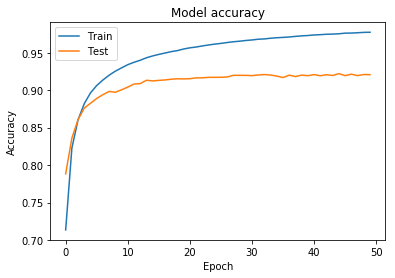

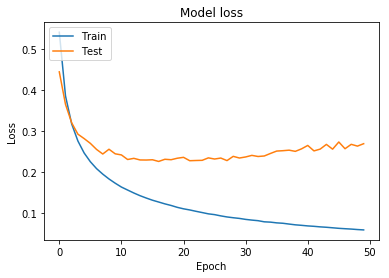

In [0]:
#All graphs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Method

To tune model, we followed a typical iterative approach. 


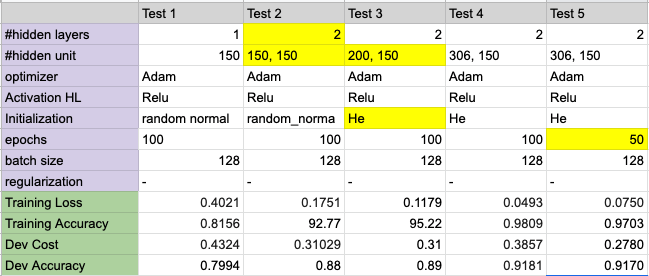

In [0]:
from IPython.display import Image
Image(filename="/gdrive/My Drive/Colab Notebooks/one.png")




---
**Test 1**

I started with the most basic form of the model with just 1 layer and Adam's optimization algorithm and trained it for 100 epochs in batches of 128 to get a basic foundational sense of how the model was performing. I observed that even after 100 epochs, the model reach only 0.8156 training accuracy and 0.79 testing accuracy. This immediately showed the avoidable bias which needed to be solved. 

---


**Test 2**


To do this, I increased the size of the network to 2 layers and ran the model to assess the effect on bias. Immediately, both accuracy metrics improved, so I learnt that further iterations would involve increasing network size till overfitting is observed. 

---




**Test 3**

For test 3, I change the weight initializations to He-initializations since they work well with Relu activation functions. I also increased the #hidden units in the first layer to 200 to see effects on accuracy, bias and variance. 
Accuracy jumped to 95% for training and 91% for the dev set, primarily because of network size increase. 

---


**Test 4**

I further increase the first layer size to 306 to match the parameter layer, accuracy increased but the dev set loss/cost increase indicated overfitting was beginning to be observed. 

---

**Test 5**

To prevent the overfitting observed in the previous test, I implemented early stopping by reducing epochs to 50. Accuracy on training set reduced by 1% but dev set accuracy decreased only by 0.10% and the loss decreasedby ~10% indicating regularization being achieved.



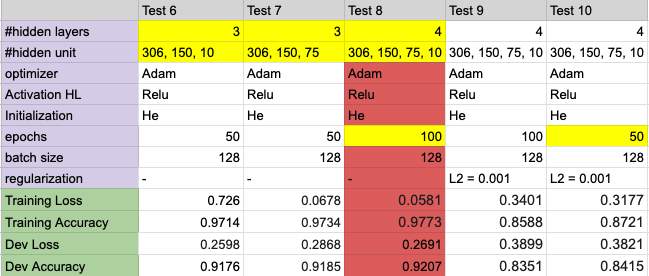

In [0]:
Image(filename="/gdrive/My Drive/Colab Notebooks/two.png")




---
**Test 6 and 7**

From test 6, I tried to increase base level accuracy of the model as much as possible. Thus, I added more hidden units to see effects on accuracy while tracking variance. 

---


**Test 8**


I added one more hidden layer to the model to futher increase accuracy. Interestingly, it increased the dev set accuracy too indicating there was not too much overfitting being observed.

---



**Test 9**

From test 9 onwards I implement L2 regularization to reduce the difference between Training Accuracy and Dev Set Accuracy to ensure the models generalizes well to unseen data. Introducted L2 regularization with 0.001 as the lambda parameter.

This drastically reduced accuracy and it is usually expected, so I decided to train for more epochs— now 100— with the same settings. 

---


**Test 10**

Even with more epochs, not much difference in accuracy was observed, however clearly, if epochs were increased to let's say 300-500, accuracy across both training set and dev set would increase. However, I ran out of computational resource access and was unable to iterate further. 

---


**END**

I decided to use the hyperparamters in Test 8 (marked in red) as my final model. The following things need to be improved on the model with further iterations:

1. Over-fitting: the difference between training accuracy and dev set accuracy is quite high and regularization needs to be implemented to reduce this. I would try combined L1, L2 regularization next, or perhaps even dropout but usually the later is used for image inputs. 

2. Training Time Epoch/Batch-size: I think some futher experimentation with #hidden layers and #hidden units is needed to try and decrease no. of epochs required to achieve the same accuracy. Even tuning batch size may affect this. 



In [0]:
# serialize weights to HDF5
classifier.save_weights("/gdrive/My Drive/Colab Notebooks/model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
model_json = classifier.to_json()
with open("/gdrive/My Drive/Colab Notebooks/model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
!ls "/gdrive/My Drive/Colab Notebooks"

data.h5   model.json  SVM_classifier.ipynb  two.png
model.h5  one.png     SVM_LOOCV.ipynb
